## Check whether input/bottle neck is sparse matrix


Official website上的model是3层down layer，3层up layer，然后output layer。


在这里我记录了3层down layer的input和output，和最后output layer的output。


我用了两种方法来看matrix是不是sparse，第一种是tensor.is_sparse，得到的结果全是false。第二种是自己写的is_sparse()，计算matrix中0的比例，大于50%则为sparse。
不知道为啥第二种每次得出来结果不一样😂。所以我得到的结果很不符合expectation，因为都不是sparse。



In [ ]:
import torch
import os

# Set the path to the directory where the files are located
save_path = '../work_dir/irdrop_mavi/'
result_dict = {}

# Loop through all files in the directory
for filename in os.listdir(save_path):
    # Check if the file has the expected format
    if filename.startswith('down') and filename.endswith('.pth'):
        # Construct the full file path
        file_path = os.path.join(save_path, filename)
        
        # Load the tensor from the file
        tensor = torch.load(file_path)
        
        # Get the shape of the tensor
        tensor_shape = tensor.shape
        
        # Print the file name and tensor shape
        print(f"File: {filename}, Tensor shape: {tensor_shape}")
        # print(is_sparse(tensor))
        print(tensor.is_sparse)
        result_dict[filename] = tensor_shape

    if filename.startswith('out') and filename.endswith('.pth'):
        # Construct the full file path
        file_path = os.path.join(save_path, filename)
        
        # Load the tensor from the file
        tensor = torch.load(file_path)
        
        # Get the shape of the tensor
        tensor_shape = tensor.shape
        
        # Print the file name and tensor shape
        print(f"File: {filename}, Tensor shape: {tensor_shape}")
        # print(is_sparse(tensor))
        print(tensor.is_sparse)
        result_dict[filename] = tensor_shape
print(result_dict)

In [4]:
def is_sparse(tensor, threshold=0.5):
    """
    Check if a tensor is sparse by computing the percentage of zero values.
    If the percentage of zero values is greater than the threshold, the tensor is considered sparse.
    """
    num_zeros = torch.sum(tensor == 0).item()
    num_elements = tensor.numel()
    percentage_zeros = num_zeros / num_elements
    return percentage_zeros > threshold

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# for key, value in result_dict.items():
#     print(key)
#     # Load the tensor from file
#     tensor = torch.load(save_path + filename)

#     # Convert the tensor to a NumPy array
#     tensor_np = tensor.detach().numpy()

#     # Select a 2D slice of the tensor (e.g., the first channel and first batch)
#     slice_2d = tensor_np[0, 0, :, :, :]

#     slice_2d1 = slice_2d.reshape(20, -1)
#     # Visualize the 2D slice using sns.heatmap
#     fig, ax = plt.subplots(figsize=(10, 8))
#     sns.heatmap(slice_2d1, ax=ax, cmap="YlGnBu")
#     plt.show()


## Visualize Inputs and Outputs

down1_output_1.pth


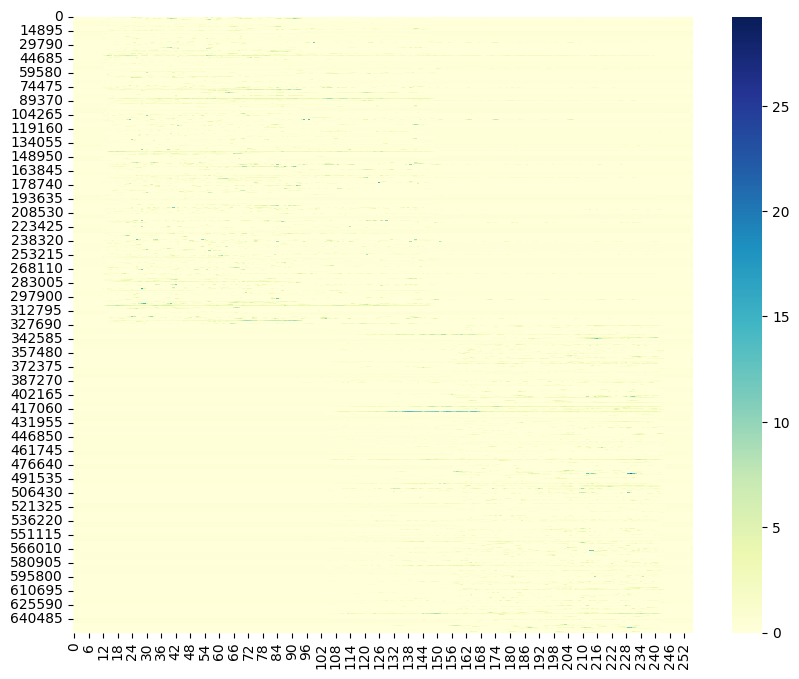

down1_output_2.pth


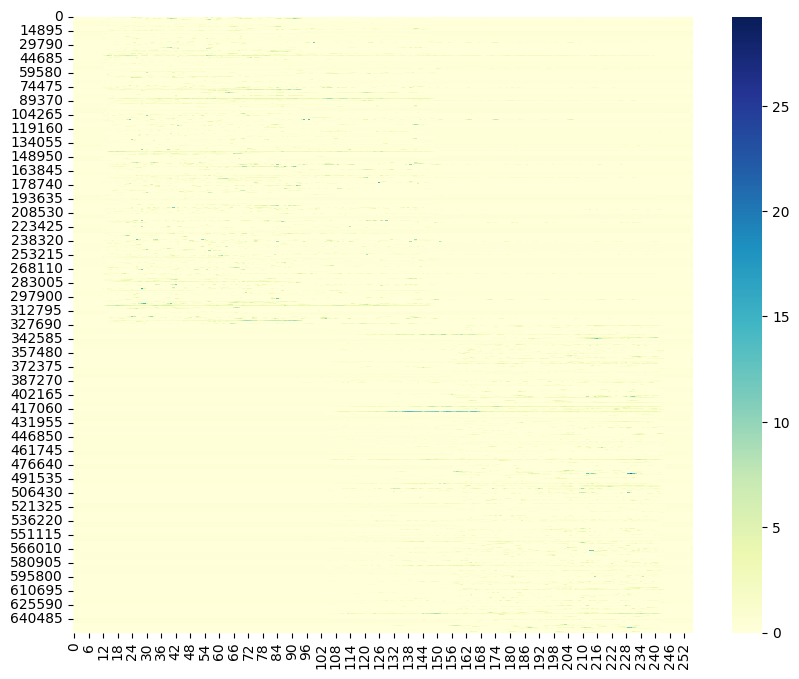

down1_output_3.pth


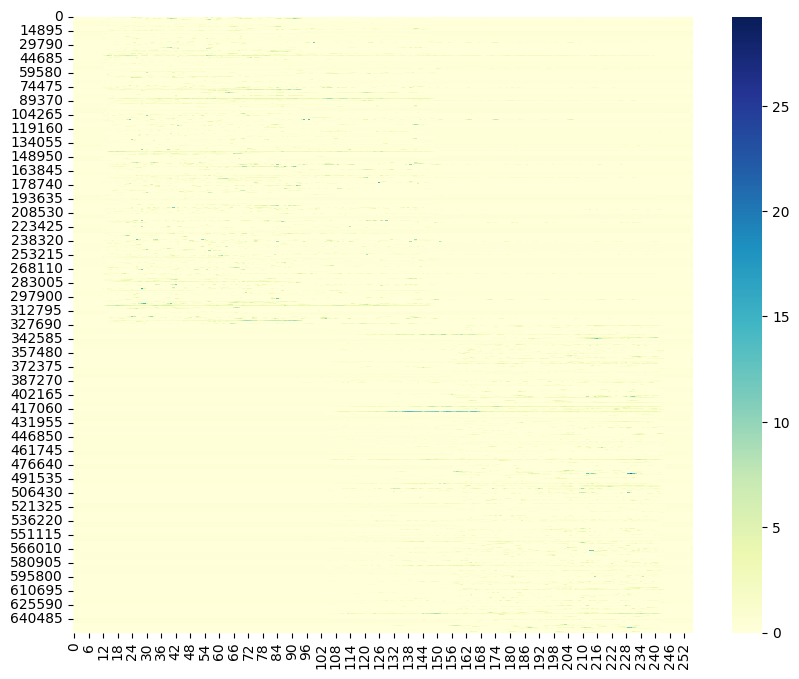

down3_input_1.pth


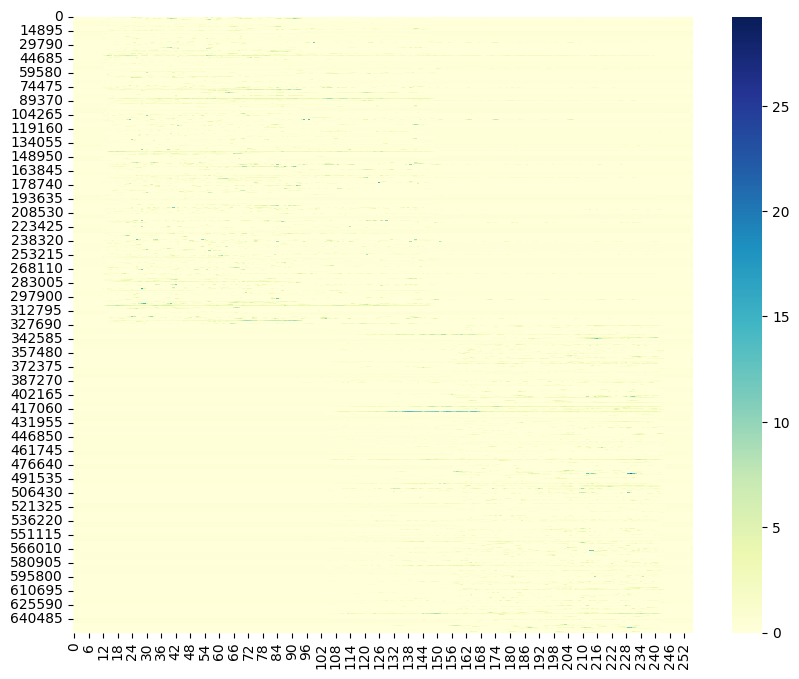

down3_input_2.pth


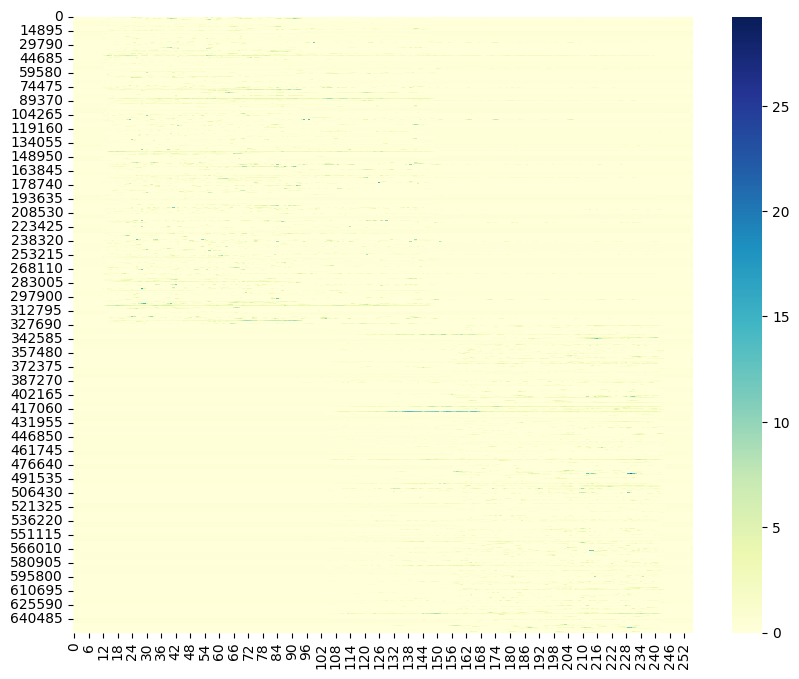

down3_input_3.pth


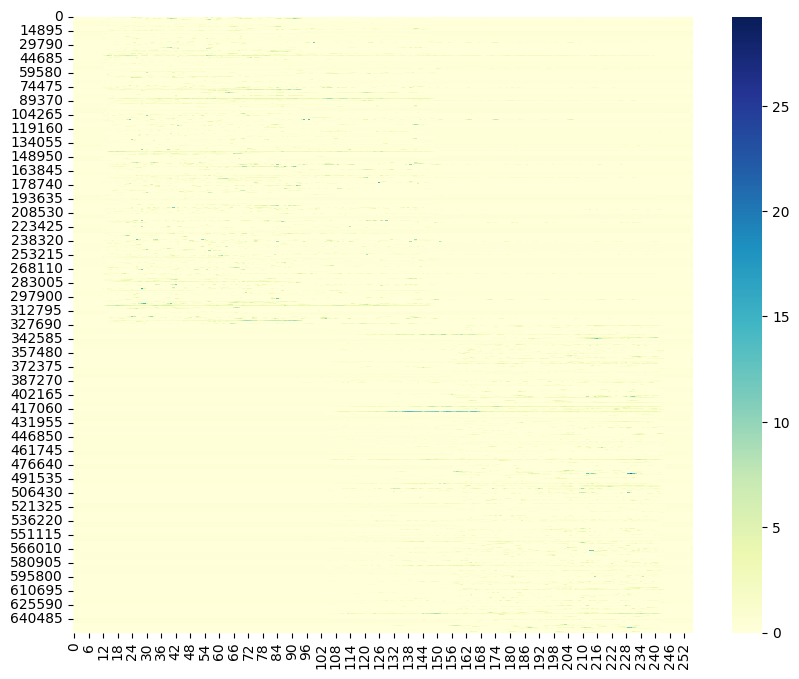

down2_input_3.pth


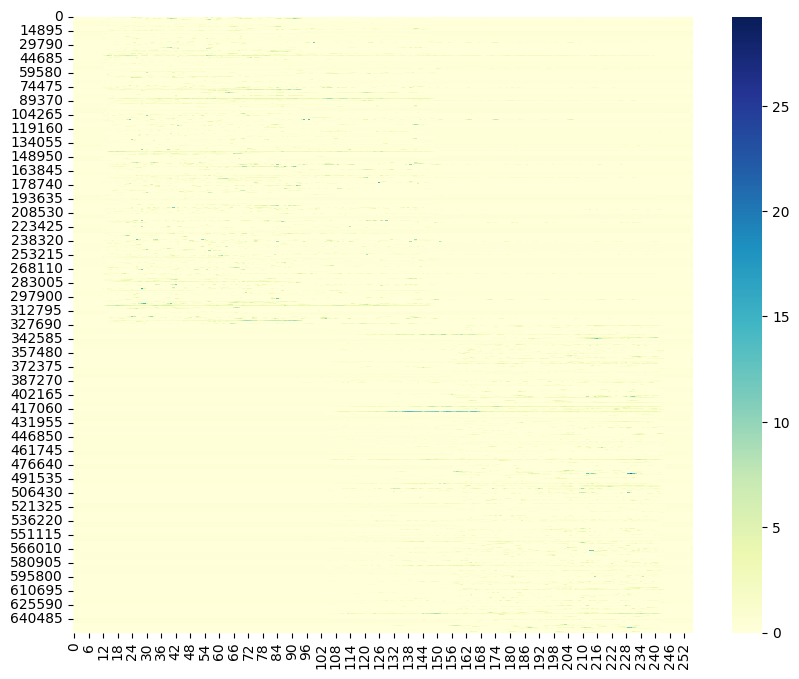

down2_input_2.pth


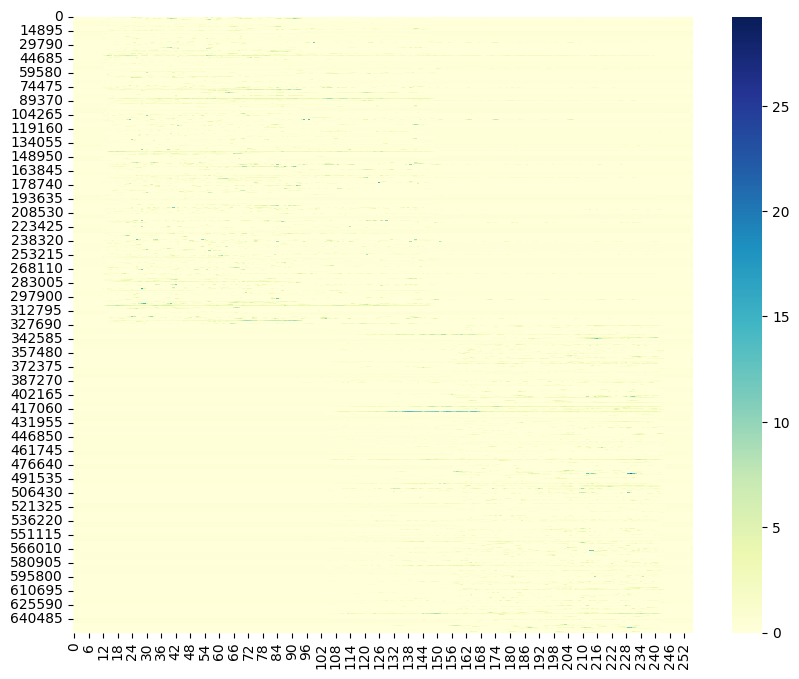

down2_input_1.pth


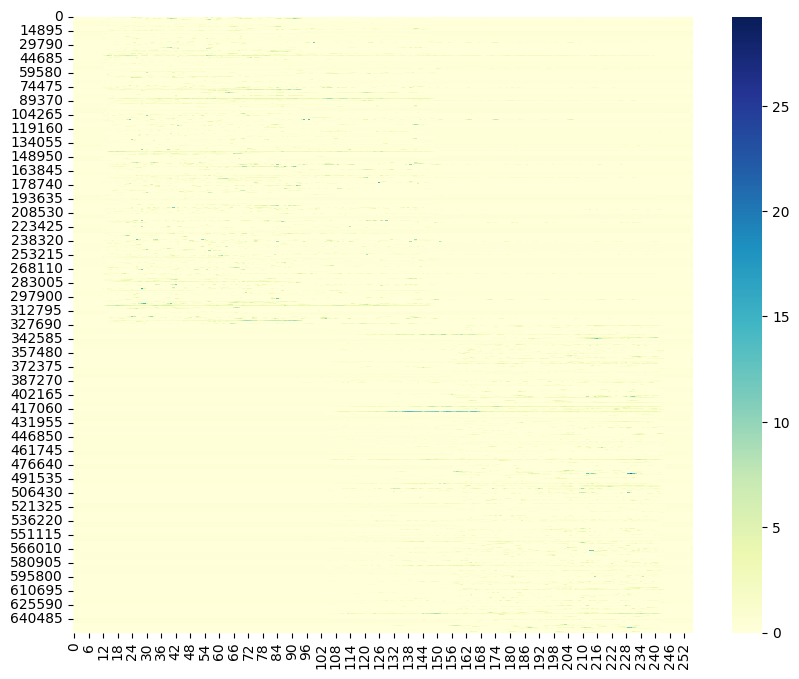

outc_output_3.pth


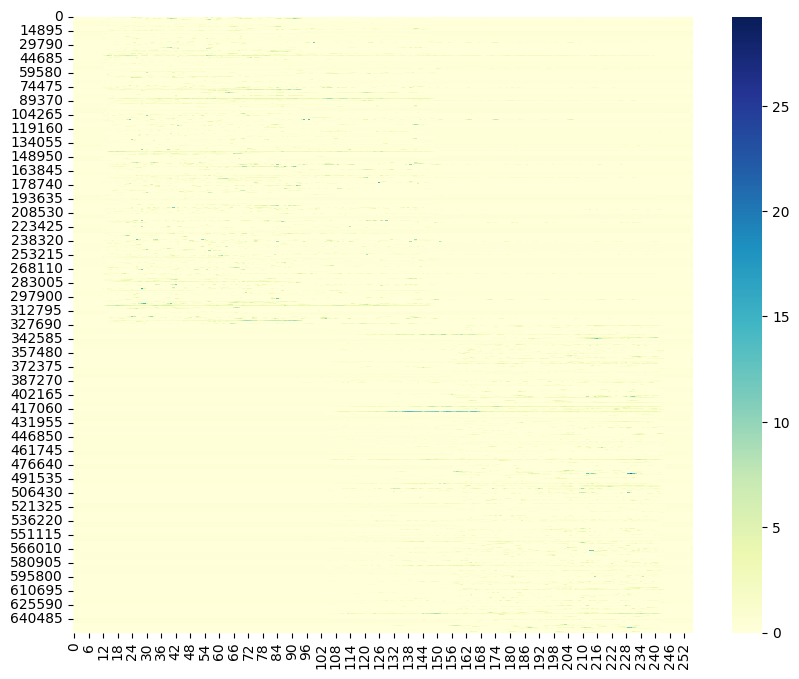

outc_output_2.pth


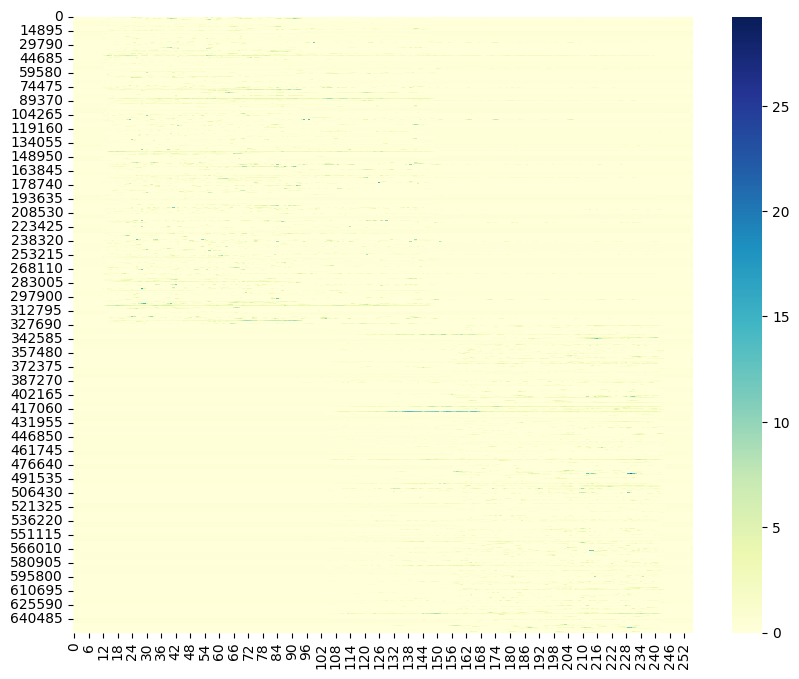

outc_output_1.pth


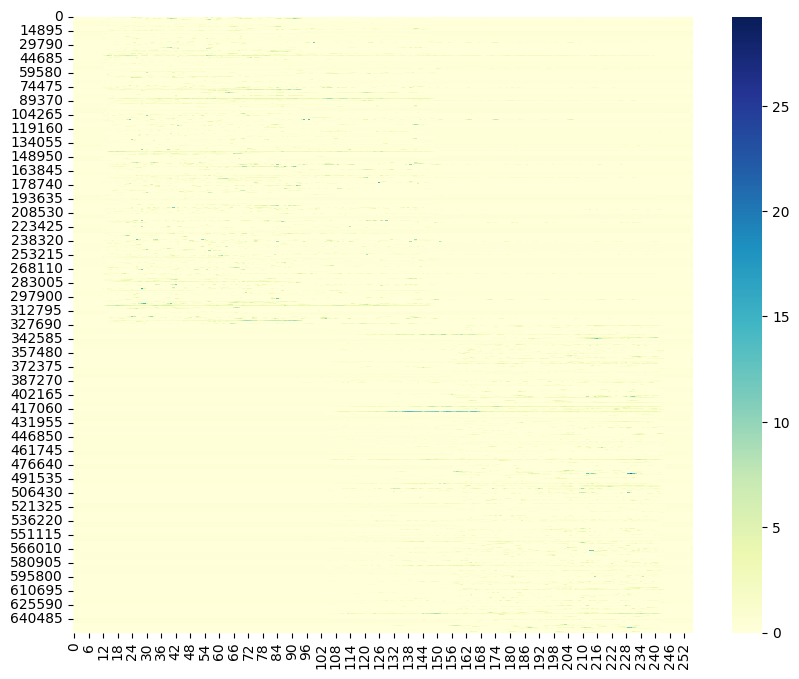

down2_output_1.pth


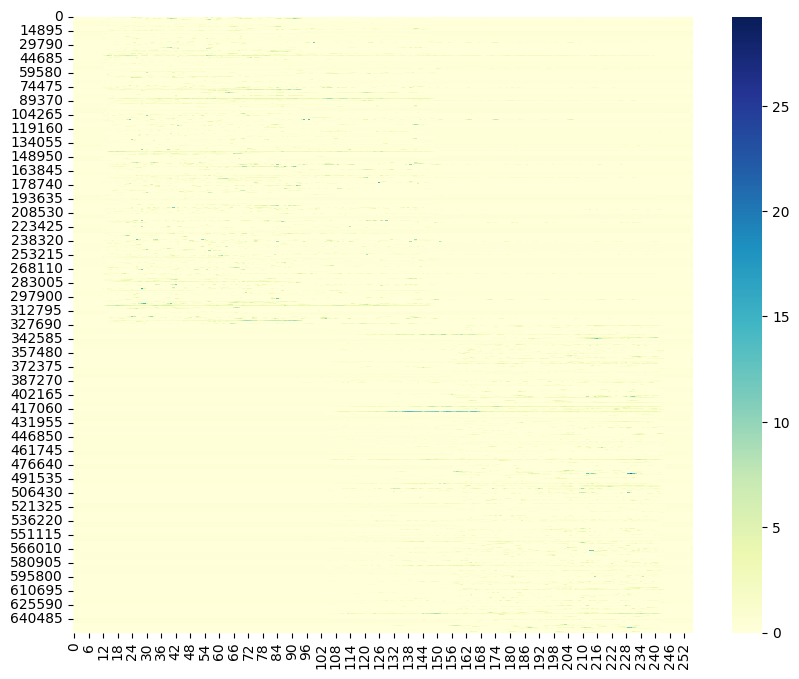

down2_output_3.pth


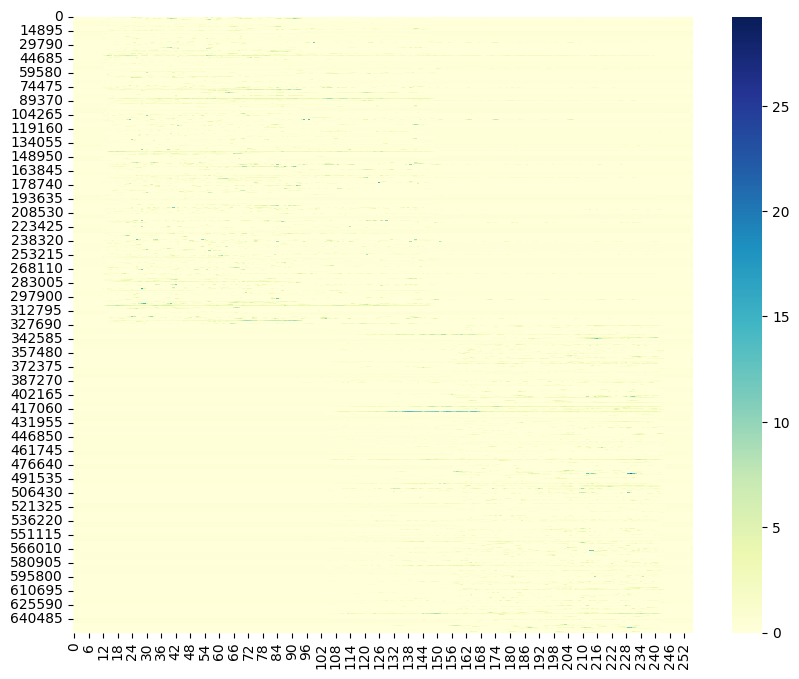

down2_output_2.pth


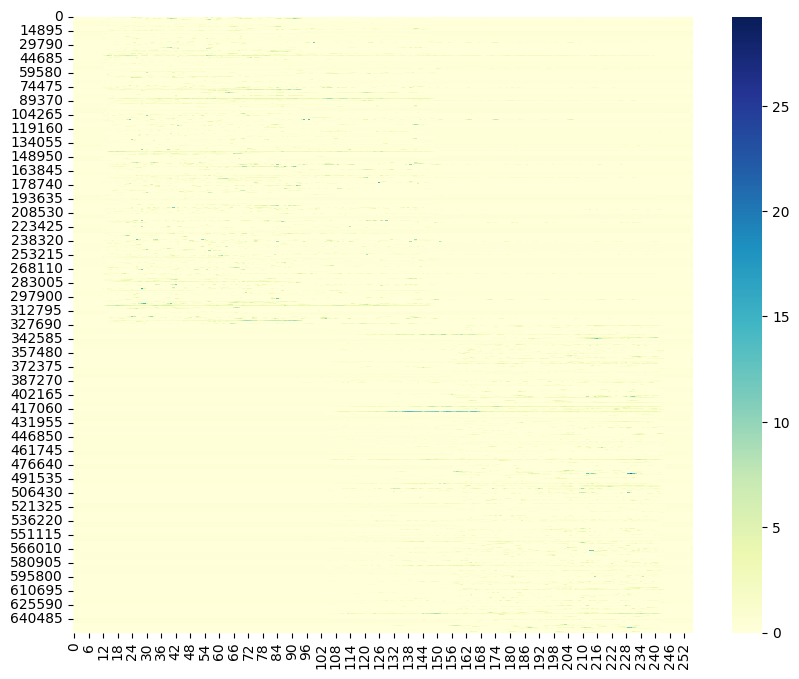

down1_input_1.pth


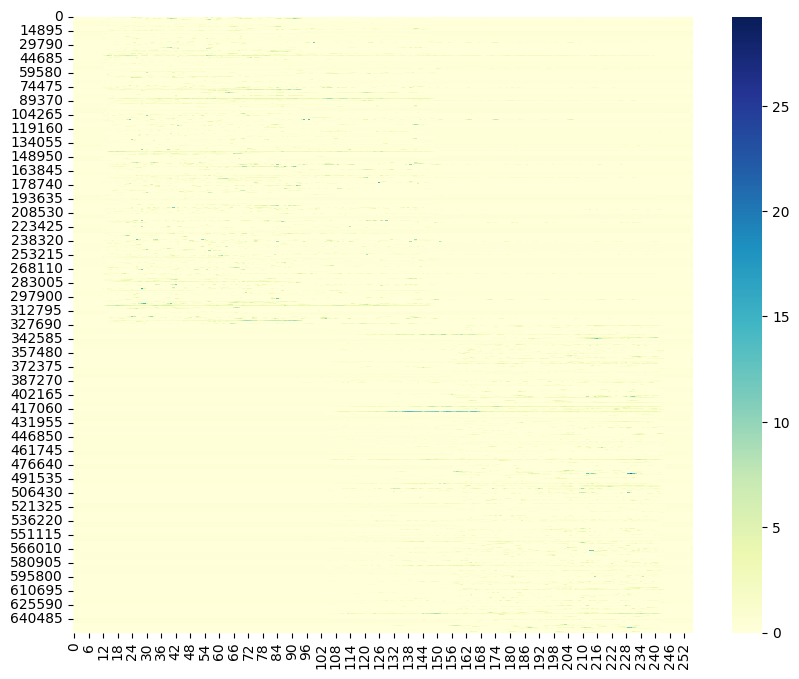

down3_output_1.pth


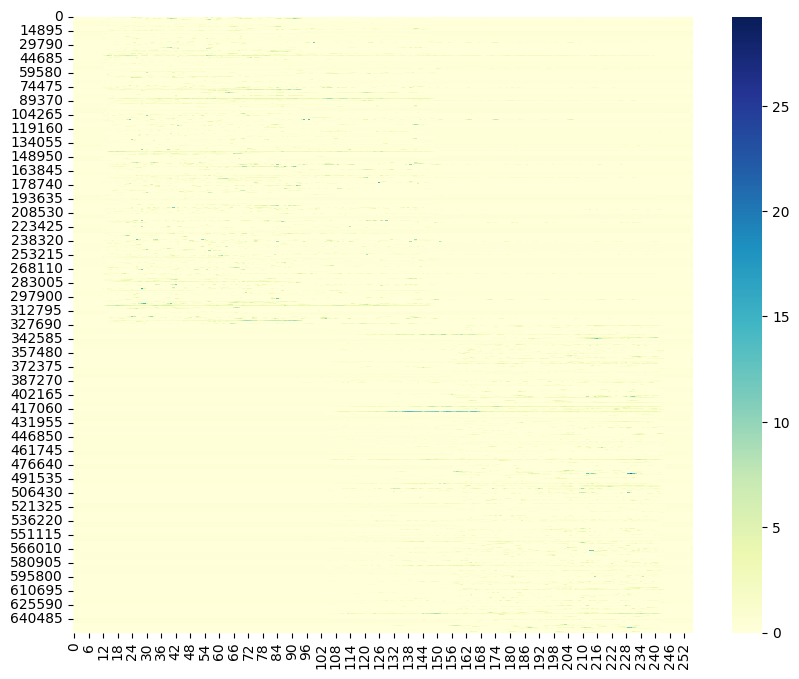

down1_input_2.pth


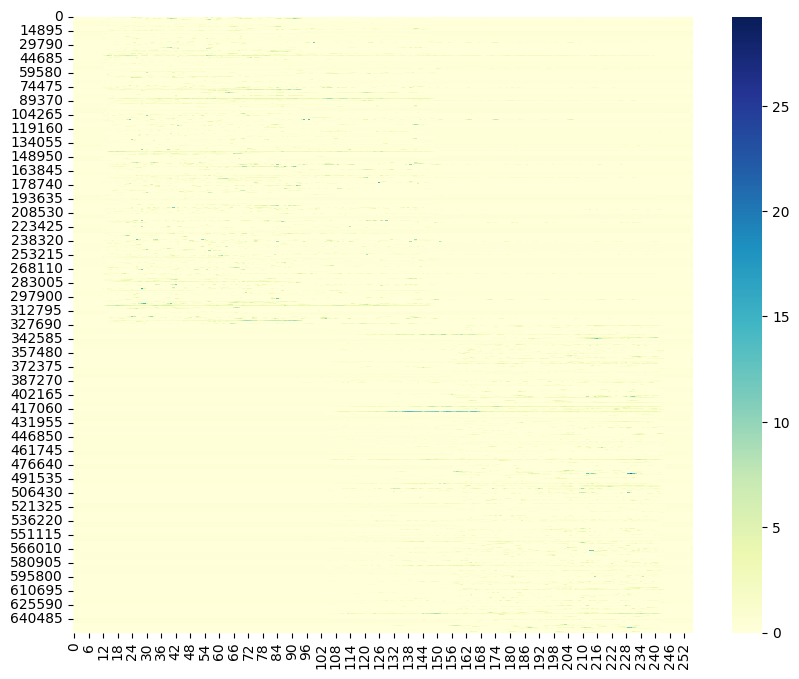

down3_output_2.pth


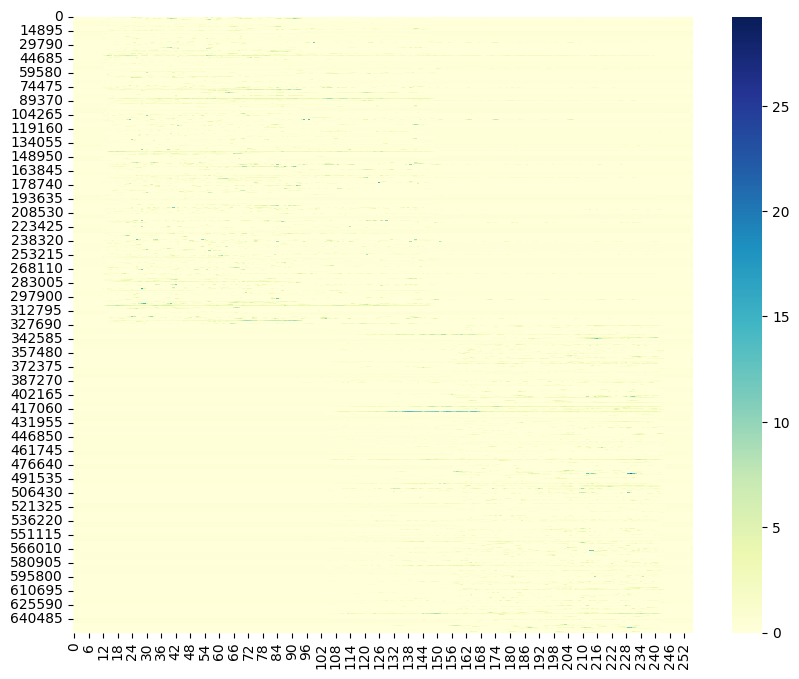

down3_output_3.pth


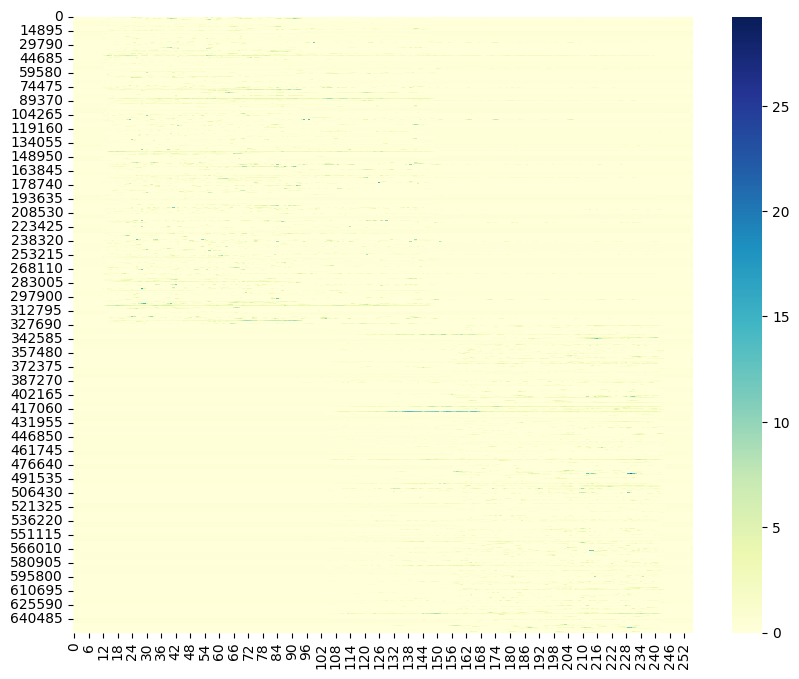

down1_input_3.pth


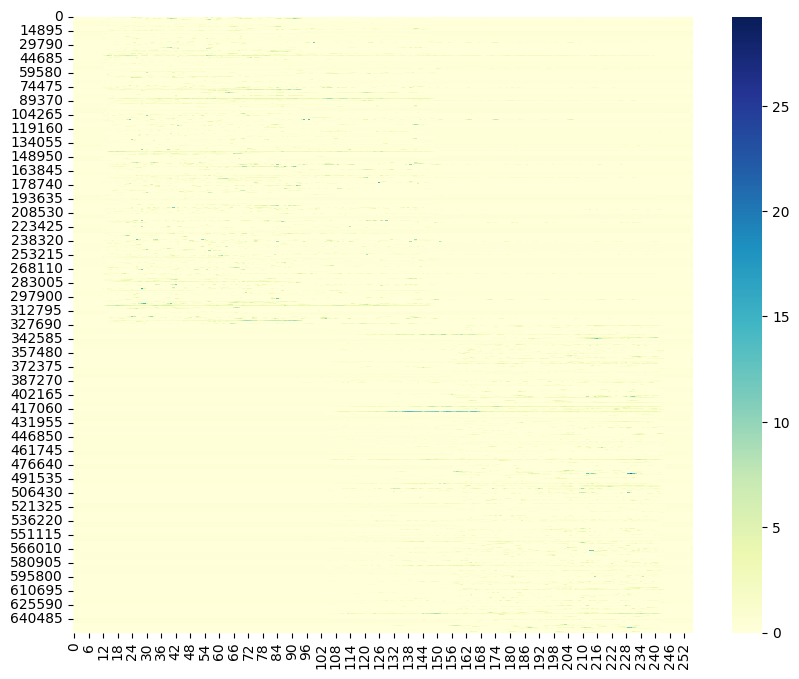

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for key, value in result_dict.items():
    print(key)
    
    # Load the tensor from file
    tensor = torch.load(save_path + filename)
    
    # Convert the tensor to a NumPy array
    tensor_np = tensor.detach().numpy()
    
    # Reshape the tensor to a 2D matrix while preserving the order of elements
    tensor_2d = tensor_np.reshape(-1, tensor_np.shape[-1])
    
    # Visualize the 2D matrix using sns.heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(tensor_2d, ax=ax, cmap="YlGnBu")
    plt.show()